# demand-forecasting
## Problem statement
**using some feature we have to predict sales**
## Data 
**Got this data from kaggle.com**
https://www.kaggle.com/competitions/demand-forecasting-kernels-only/overview
## Evaluation
* mean square error
* mean absolute error
* accuracy(r2)
* Symmetric mean absolute percentage error
## Features
* date - Date of the sale data. There are no holiday effects or store closures.
* store - Store ID
* item - Item ID
* sales - Number of items sold at a particular store on a particular date.

In [1]:
#import necessary libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as miss

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# lets load training data
df=pd.read_csv('train.csv')
df.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# Data Analysis (EDA)/Feature Engineering and Cleaning *(Data Manipulation)*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [6]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
#Lets do some feature engineering
def date_time(x):
    year=x.split("-")[0]
    month=x.split("-")[1]
    day=x.split("-")[2]
    return year , month , day

In [8]:
df['store'].value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [9]:
def outlier(df):
    for col in df.columns:
        if df[col].dtype == "int64":
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            print(col)
            print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
            print(lower ,">",col,"<",upper)
            plt.figure(figsize=(15,5))
            sns.boxplot(df[col],palette="Set2")
            plt.show()
            df=df[(df[col]>=lower) & (df[col]<=upper)]
    return df

store
Q1 =  3.0  Q3 =  8.0  IQR =  5.0
-4.5 > store < 15.5


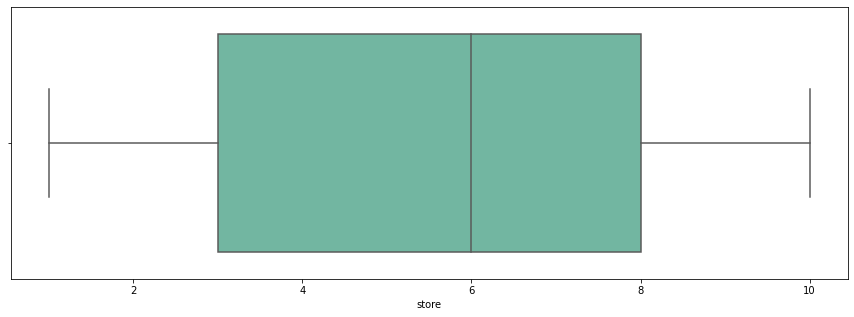

item
Q1 =  13.0  Q3 =  38.0  IQR =  25.0
-24.5 > item < 75.5


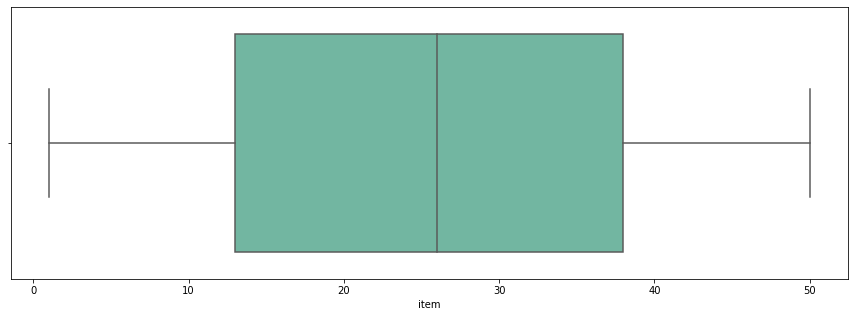

sales
Q1 =  29.0  Q3 =  68.0  IQR =  39.0
-29.5 > sales < 126.5


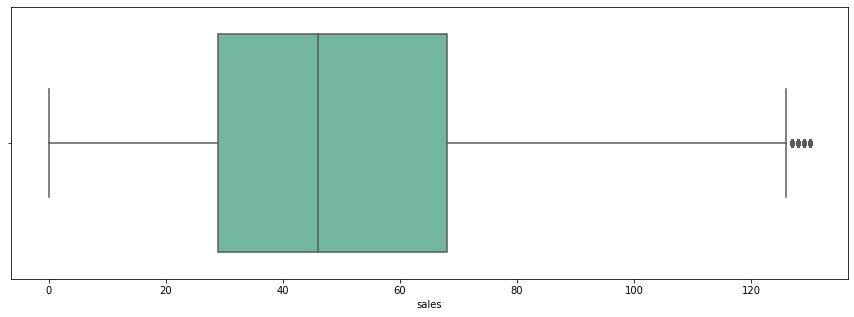

In [12]:
df=outlier(df)

In [13]:
len(df)

897498

In [21]:
n=np.zeros(10)
for i in range(1,11):
    g=df[df['store']==i]['sales']
    n[i-1]=np.mean(g)

In [28]:
store=np.array([0,1,2,3,4,5,6,7,8,9])

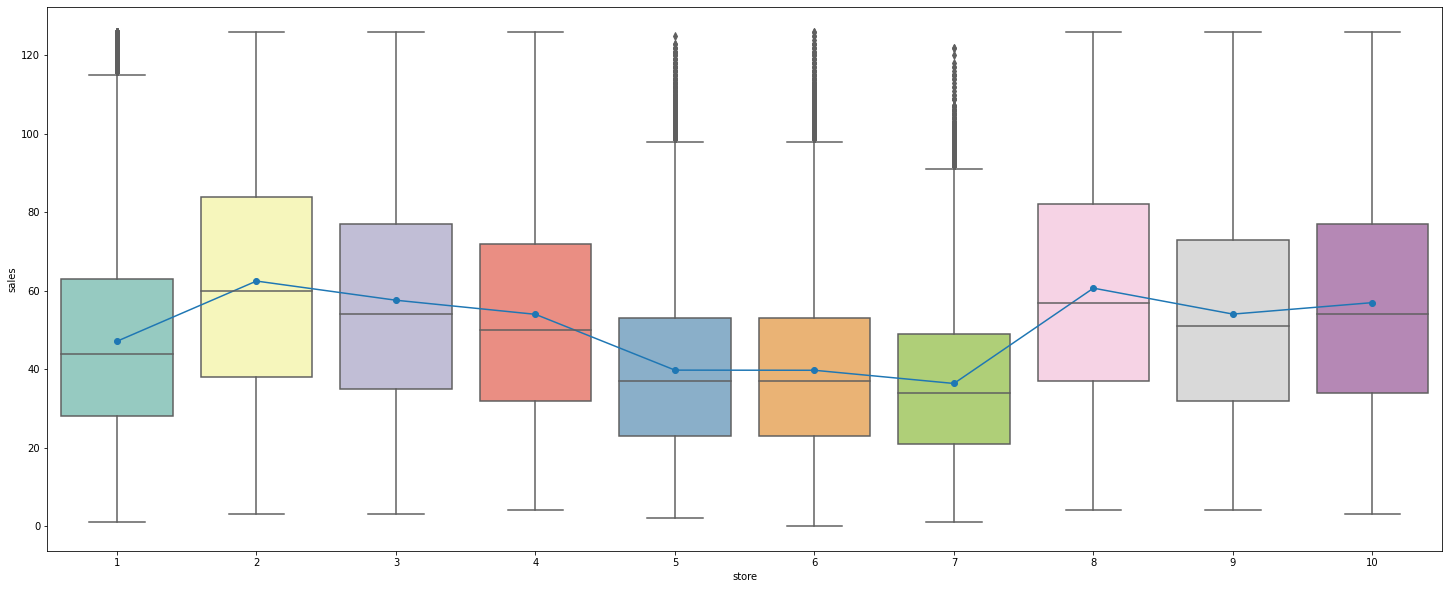

In [29]:
plt.figure(figsize=(25,10))
sns.boxplot(x="store", y="sales",
                 data=df, palette="Set3")
plt.plot(n);
plt.scatter(store,n)

<Figure size 1800x720 with 0 Axes>

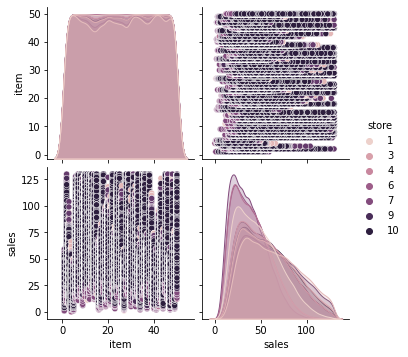

In [13]:
plt.figure(figsize=(25,10))
sns.pairplot(df, hue="store");

In [14]:
df['year']=df['date'].str.extract(r'(\d{4})-\d{1,2}-\d{1,2}')

In [15]:
df['month']=df['date'].str.extract(r'\d{4}-(\d{1,2})-\d{1,2}')

In [16]:
df['day']=df['date'].str.extract(r'\d{4}-\d{1,2}-(\d{1,2})')

**Although we had created a function for this but as the size of our dataset is to large hence this was a better approch**

In [17]:
df['store'].value_counts()

5     91300
7     91300
6     91298
1     91210
4     90576
9     90511
10    89841
3     89676
8     88234
2     87087
Name: store, dtype: int64

In [18]:
#lets kill this imbalancement
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_resample(df.drop('store',axis=1), df['store'])

In [19]:
df=pd.concat([X_resampled, y_resampled],axis=1)

In [20]:
df.head()

,date,item,sales,year,month,day,store
0,2015-02-24,38,50,2015,02,24,1
1,2017-06-06,24,77,2017,06,06,1
2,2014-10-26,24,73,2014,10,26,1
3,2013-10-23,26,31,2013,10,23,1
4,2016-03-05,12,71,2016,03,05,1


In [21]:
df['store'].value_counts()

1     87087
2     87087
3     87087
4     87087
5     87087
6     87087
7     87087
8     87087
9     87087
10    87087
Name: store, dtype: int64

In [22]:
#drop date column
df=df.drop('date',axis=1)

In [23]:
df.head()

,item,sales,year,month,day,store
0,38,50,2015,02,24,1
1,24,77,2017,06,06,1
2,24,73,2014,10,26,1
3,26,31,2013,10,23,1
4,12,71,2016,03,05,1


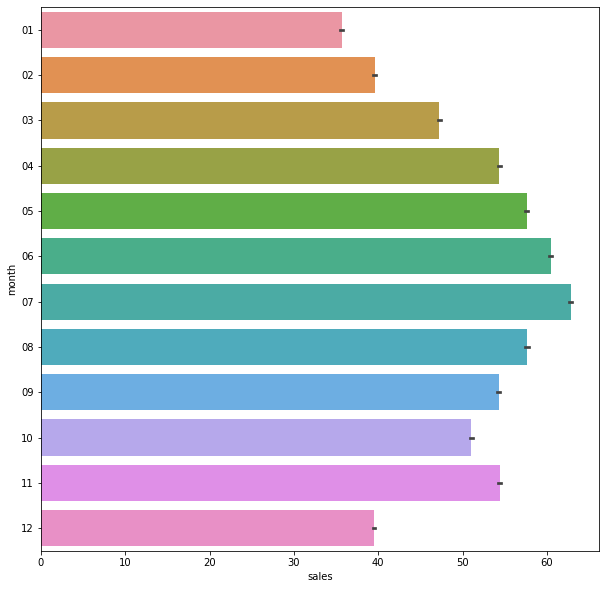

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(df['sales'],df['month'].sort_values(ascending=True));

**Hmm sales are highest in summer(month=07)**

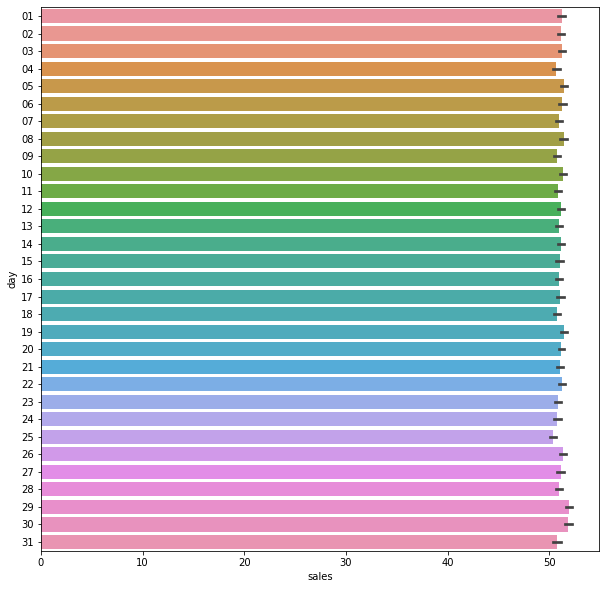

In [25]:
# check for days
plt.figure(figsize=(10,10))
sns.barplot(df['sales'],df['day'].sort_values(ascending=True));

**No pattern found**

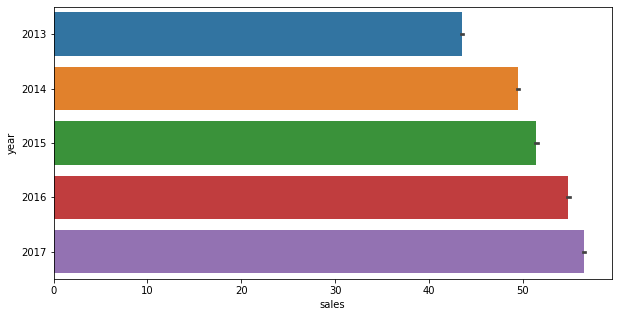

In [26]:
# check for YEARS
plt.figure(figsize=(10,5))
sns.barplot(df['sales'],df['year'].sort_values(ascending=True));

**AAHAA!! This show our store is continously gaining popularity**

In [27]:
sample=pd.read_csv('sample_submission.csv')
sample.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


# MODELLING

In [28]:
x=df.drop('sales',axis=1)
y=df['sales']
stratify=df['store']
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=42,test_size=0.2,stratify=stratify)

In [29]:
x_train['store'].value_counts()

2     69670
9     69670
8     69670
3     69670
1     69670
6     69670
10    69669
4     69669
5     69669
7     69669
Name: store, dtype: int64

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Define the function to return the SMAPE value
def smape(a, f):
    a=np.array(a)
    f=np.array(f)
    return 1/len(a) * np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f))*100)
def evaluate(y,y_pred):
    print("r2_score : ",r2_score(y, y_pred))
    print("mean_absolute_error : ",mean_absolute_error(y, y_pred))
    print("mean_squared_error : ",mean_squared_error(y, y_pred))
    print("SMAPE : ",smape(y, y_pred))

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

In [32]:
model=RandomForestRegressor()
model.fit(x_train,y_train);

In [33]:
model.score(x_valid,y_valid)

0.9032660622717145

In [47]:
evaluate(y_valid,model.predict(x_valid))

r2_score :  0.9032660622717145
mean_absolute_error :  5.49211099245582
mean_squared_error :  70.29583894266653
SMAPE :  11.834698840750846


In [45]:
regr = BaggingRegressor(base_estimator=LinearRegression(),
                        n_estimators=100, random_state=0).fit(x_train
                                                              , y_train);

In [48]:
regr.score(x_valid,y_valid)

0.037732253193632825

In [49]:
evaluate(y_valid,regr.predict(x_valid))

r2_score :  0.037732253193632825
mean_absolute_error :  21.656878510747365
mean_squared_error :  699.2728729727263
SMAPE :  44.6025605400182


In [63]:
test=pd.read_csv('test.csv')
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [64]:
len(test)

45000

In [65]:
sample.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


In [66]:
ID=test['id']

In [67]:
test['year']=test['date'].str.extract(r'(\d{4})-\d{1,2}-\d{1,2}')

In [68]:
test['month']=test['date'].str.extract(r'\d{4}-(\d{1,2})-\d{1,2}')

In [69]:
test['day']=test['date'].str.extract(r'\d{4}-\d{1,2}-(\d{1,2})')

In [70]:
test.head()

,id,date,store,item,year,month,day
0,0,2018-01-01,1,1,2018,01,01
1,1,2018-01-02,1,1,2018,01,02
2,2,2018-01-03,1,1,2018,01,03
3,3,2018-01-04,1,1,2018,01,04
4,4,2018-01-05,1,1,2018,01,05


In [71]:
x_train.head()

,item,year,month,day,store
813003,16,2014,07,14,10
855823,14,2014,02,07,10
800883,46,2013,05,27,10
127935,24,2015,12,26,2
265261,10,2014,11,01,4


In [73]:
t=['id','date']
test=test.drop(t,axis=1)

In [74]:
test.head()

,store,item,year,month,day
0,1,1,2018,01,01
1,1,1,2018,01,02
2,1,1,2018,01,03
3,1,1,2018,01,04
4,1,1,2018,01,05


In [75]:
st=test['store']
test=test.drop('store',axis=1)

In [76]:
test=pd.concat([test,st],axis=1)

In [77]:
test.head()

,item,year,month,day,store
0,1,2018,01,01,1
1,1,2018,01,02,1
2,1,2018,01,03,1
3,1,2018,01,04,1
4,1,2018,01,05,1


In [78]:
x_train.head()

,item,year,month,day,store
813003,16,2014,07,14,10
855823,14,2014,02,07,10
800883,46,2013,05,27,10
127935,24,2015,12,26,2
265261,10,2014,11,01,4


In [79]:
sample.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


In [80]:
pred=model.predict(test)

In [81]:
sub=pd.DataFrame({'id':ID,
                 'sales':pred})

In [82]:
sub.head()

,id,sales
0,0,14.72
1,1,14.93
2,2,13.75
3,3,16.00
4,4,14.62


In [83]:
sub.to_csv('my_sub',index=False)